In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

from sklearn import preprocessing, decomposition, model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [ ]:
!wget https://raw.githubusercontent.com/EleonoraAiello/AIM23-24/main/dataT1DEXIstudyVideo_sedentary.csv

In [10]:
%matplotlib inline
plt.style.use('bmh')
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize' : 14,
                     'ytick.labelsize' : 14,
                     'figure.figsize' : [10,6],
                     })

In [3]:
dataTable = pd.read_csv("dataT1DEXIstudyVideo_sedentary.csv")
dataTable.head()
clean_dataTable = dataTable.dropna()

In [11]:
exerciseData_activityClassifier=clean_dataTable.loc[:,['Minimum_HR','Maximum_HR','Average_HR',
                                                       'Delta_HR','Standard_Dev_SC','Maximum_SC',
                                                       'Average_SC','Sum_SC']]


random_state=1

X_train, X_test, y_train, y_test = model_selection.train_test_split(exerciseData_activityClassifier,
                                                                    clean_dataTable.ActivityCategorical, 
                                                                    test_size=0.30,
                                                                    random_state=random_state)

In [12]:
scaler = preprocessing.MinMaxScaler().fit(X_train) 

df_scaled_X = scaler.transform(X_train)
df_scaled_X_test = scaler.transform(X_test)

y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [13]:
layers = (5,2) 
max_iter = 5000

neuralNet = MLPClassifier(solver='adam', learning_rate_init=0.0001, hidden_layer_sizes=layers, 
                          max_iter = max_iter, verbose=False, random_state=1) 
neuralNet.fit(df_scaled_X, y_train) 

print('Training Accuracy: ', neuralNet.score(df_scaled_X, y_train))
print('Validation Accuracy: ', neuralNet.score(df_scaled_X_test, y_test))


Training Accuracy:  0.8121236451224408
Validation Accuracy:  0.7940074906367042


In [ ]:
#DA Allineare
fig, ax = plt.subplots(figsize=(20, 6))
pd.DataFrame(history.history).iloc[:, [0,2]].plot(ax=ax)
plt.xlabel('Epochs')
plt.xticks([0, 1, 2, 3, 4], [ 1, 2, 3, 4,5])

fig, ax = plt.subplots(figsize=(20, 6))
pd.DataFrame(history.history).iloc[:, [1,3]].plot(ax=ax)
plt.xlabel('Epochs')
plt.xticks([0, 1, 2, 3, 4], [ 1, 2, 3, 4,5])

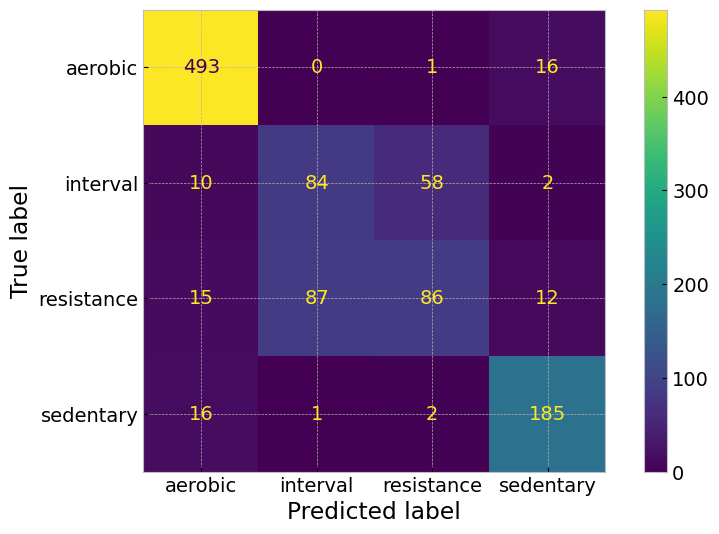

In [14]:
predictions = neuralNet.predict(df_scaled_X_test)
cm = confusion_matrix(y_test, predictions, labels=neuralNet.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aerobic','interval','resistance','sedentary'])

disp.plot()
plt.show()